# Heart Attack Analysis & Prediction

#### Before we get started, take a quick look at a transcript of each of the items of my dataset:

`1.` **age**: Patient's age

`2.` **sex**: Gender of the patient
   * 1 - male
   * 0 - female

`3.` **cp**: Type of chest pain 
   * 0: typical angina pectoris
   * 1: atypical angina
   * 2: pain unrelated to angina
   * 3: asymptomatic

`4.` **trtbps**: Resting blood pressure (in mmHg) 

`5.` **chol**: Cholesterol level in mg/dl is determined using a BMI sensor

`6.` **fbs**: (fasting blood sugar > 120 mg/dl): 
   * 1 = true
   * 0 = false

`7.` **restecg**: resting electrocardiography results
   * 0 = norm
   * 1 = Normality of the ST-T wave
   * 2 = Hypertrophy of the left ventricle

`8.` **thalachh**: Maximum heart rate reached

`9.` **exng**: Angina pectoris caused by exercise
   * 1 = Yes
   * 0 = No

`10.` **?old peak**: Previous peak 

`11.` **?slp**: Slope. There are 3 categories

`12.` **?caa**: Coronary Artery Anomalies. There are 5 categories

`13.` **?thall**: Thallium stress test result. There are 4 categories

`14.` **output**: Target variable
   * 0 = not at risk
   * 1 = at risk

#### For my project, I'll use some libraries. Here are they:

In [300]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

Let me demonstrate the structure 

In [301]:
df = pd.read_csv('heart.xls')

#renaming 'output' column to 'target' for a better understanding
new_columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','target']
df.columns = new_columns

df_copy = df.copy()
df_copy.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


## Exploratory data analysis

In [302]:
df_copy.shape

(303, 14)

In [303]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [304]:
df_copy.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

### **Notes**
`- no null data`
`- 304 rows, 14 columns`
`- data types - [int & float]`

In [305]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trtbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalachh,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exng,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [306]:
df_copy.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
target        2
dtype: int64

### **Notes**
`- small unique values - categorical data`
`- big unique values - numerical data `

In [307]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'target']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak'] 

In [308]:
df_copy.duplicated().sum()

1

In [309]:
df_copy.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


Here are 2 new columns: "age category" and "blood pressure type"

In [310]:
df_copy['age_cat'] = pd.cut(x=df_copy['age'], 
                            bins=[20, 40, 60, df_copy['age'].max()], 
                            labels=['0', '1', '2'])
df_copy['pres_type'] = pd.cut(x=df_copy['trtbps'], 
                            bins=[90, 119, 129, 139, df_copy['trtbps'].max()], 
                            labels=['0', '1', '2', '3'])

`age_cat` - Age Category:
* 0 - Adult(20-40 y.o)
* 1 - Middle Age Adult(41-60 y.o)
* 2 - Senior Adult(61+ y.o)

`pres_type` - Blood pressure type:
* 0 - normal (<120 bpm)
* 1 - elevated (120-129 bpm)
* 2 - high pressure st1 (130-139 bpm)
* 3 - high pressure st2 (140+ bpm)

In [311]:
cat_cols.append('age_cat')
cat_cols.append('pres_type')
df_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target,age_cat,pres_type
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1,2,3
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1,0,2
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1,1,2
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1,1,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0,1,3
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0,1,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0,2,3
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0,1,2


## First View Visualization

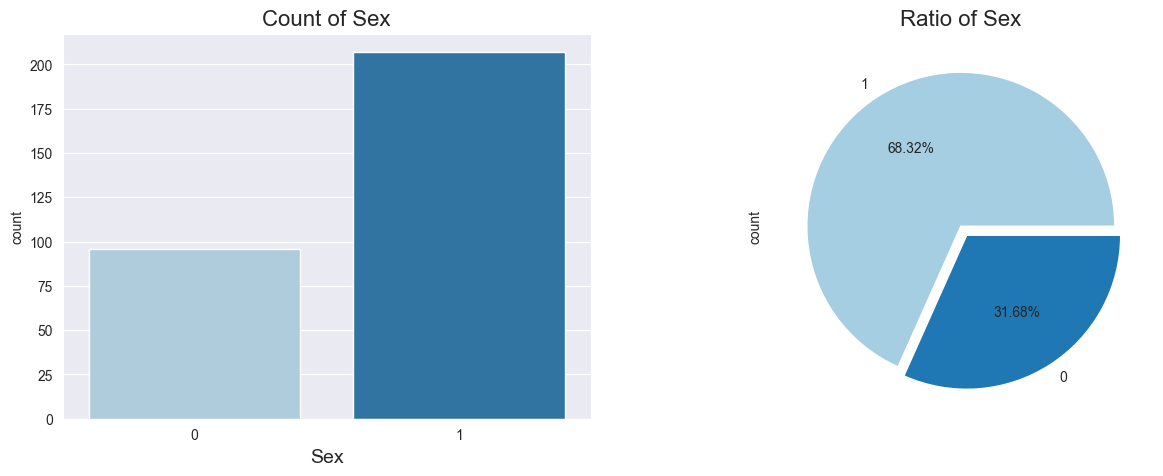

In [312]:
palette_color = sns.color_palette("Paired")

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy, 
                   x=df_copy['sex'],
                   ax = axs[0],
                   palette=["#a6cee3", "#1f78b4"])

ax.set_xlabel('Sex', fontsize=14)
axs[0].set_title("Count of Sex", fontsize=16)

ax2 = df_copy['sex'].value_counts().plot.pie(explode=[0,0.07], 
                                             colors=["#a6cee3", "#1f78b4"],
                                             ax = axs[1],
                                             autopct='%.2f%%')
axs[1].set_title("Ratio of Sex", fontsize=16);

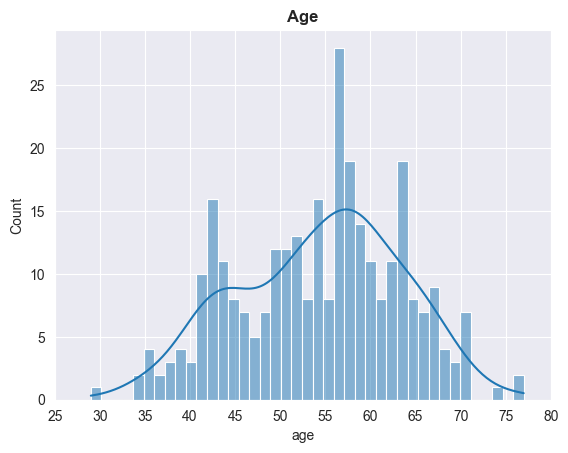

In [313]:
sns.histplot(data = df_copy,
             x = 'age',
             bins = 41,
             kde = True)
plt.title('Age',  fontweight = 'bold')

plt.xticks(range(25,81,5))
plt.show()


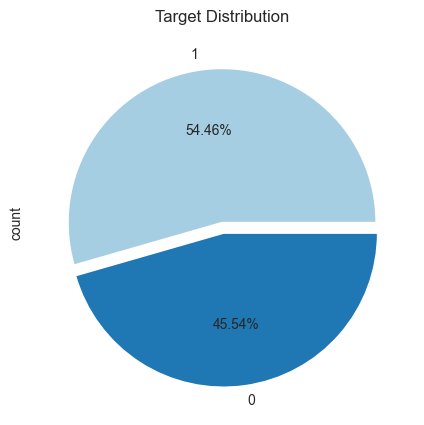

In [314]:
ax = df_copy['target'].value_counts().plot.pie(explode=[0,0.07], 
                                               colors=["#a6cee3", "#1f78b4"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Target Distribution');


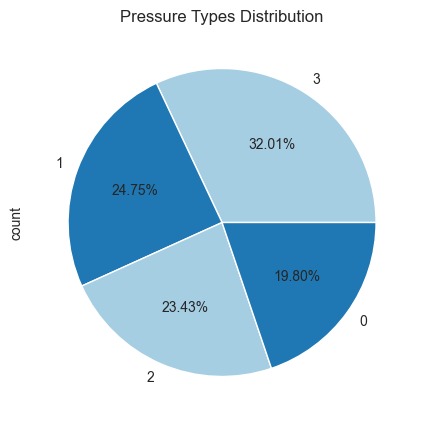

In [315]:
ax = df_copy['pres_type'].value_counts().plot.pie(
                                               colors=["#a6cee3", "#1f78b4"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Pressure Types Distribution');

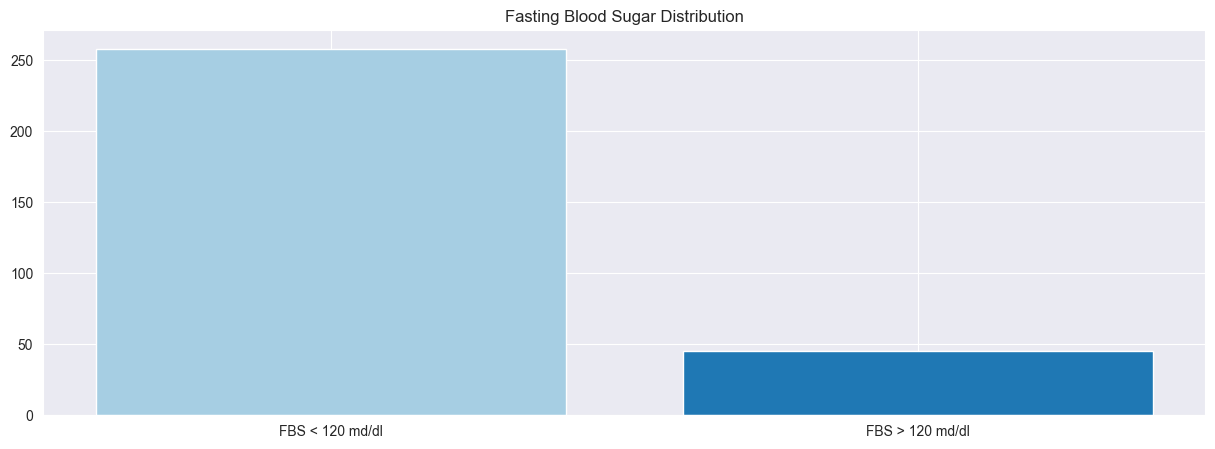

In [316]:
fbs_count = df_copy['fbs'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(fbs_count.index, fbs_count.values, color=["#a6cee3", "#1f78b4"])
plt.title('Fasting Blood Sugar Distribution')
plt.xticks(ticks=[0, 1], 
           labels=['FBS < 120 md/dl', 'FBS > 120 md/dl' ])
plt.show()

## Data Formation

There are some categorical aspects of my dataset, that wasn't fully describeв by its creator. So, I have no idea what they mean and I can't check it anywhere. The categorising idea of these aspects are not traditional. Hence, I should drop this data out of the dataset to make the research more objective.

#### These aspects are: old peak, slp, caa, thall

In [317]:
df_copy = df_copy.drop(['oldpeak', 'caa', 'thall', 'slp'], axis=1)

## Hypothesis

#### My Hypothesis is: female gender, atypical angina, middle age category and HP ST2 are the main features of people who are at heart attack risk group

Let's check it:

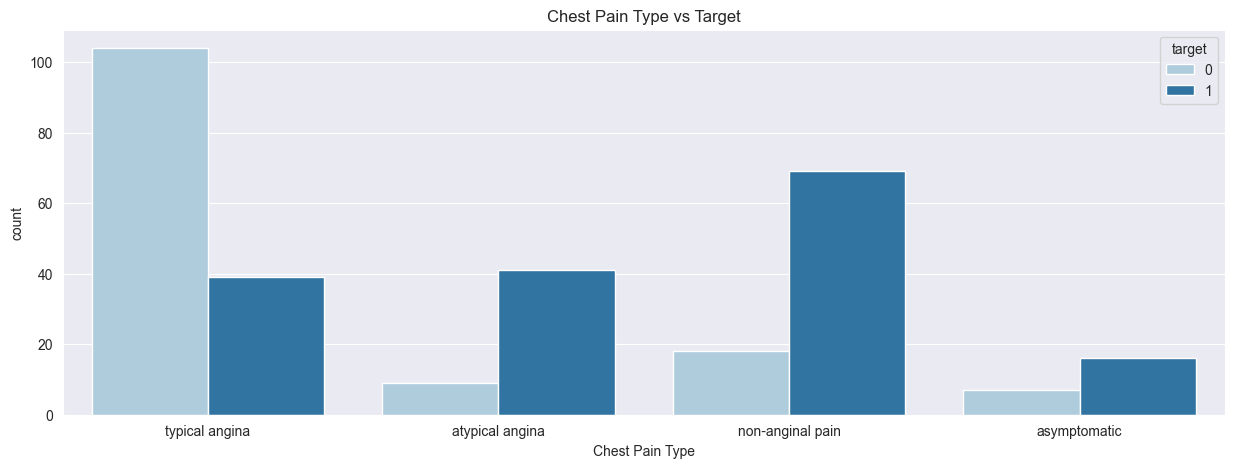

In [318]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, 
              x='cp', 
              hue='target', 
              palette=["#a6cee3", "#1f78b4"])
plt.title('Chest Pain Type vs Target')
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0,1,2,3], 
           labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=0);

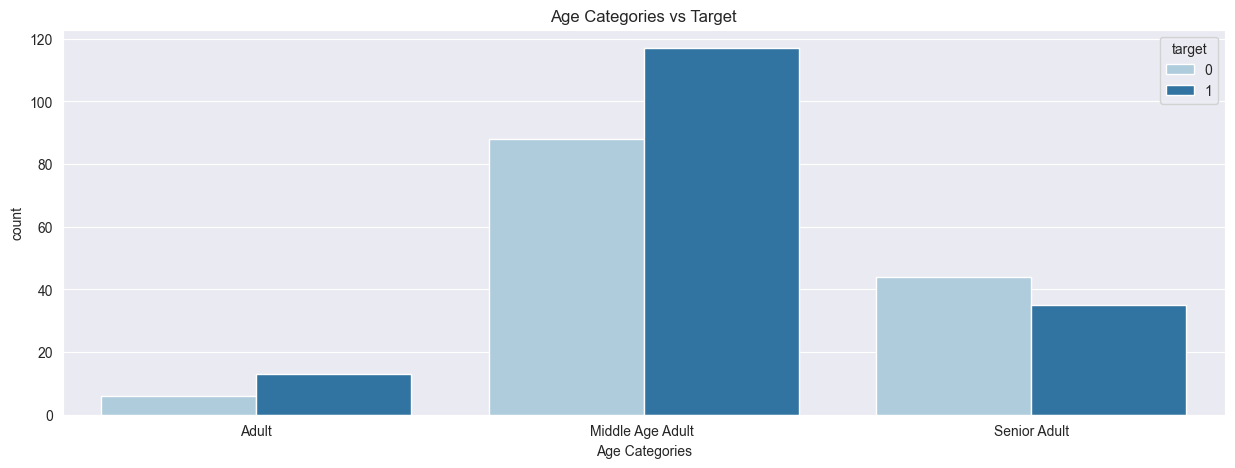

In [319]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, x='age_cat', 
              hue='target', 
              order=['0', '1', '2'],
              palette=["#a6cee3", "#1f78b4"])
plt.title('Age Categories vs Target');
plt.xlabel('Age Categories')
plt.xticks(ticks=['0','1','2'], 
           labels=['Adult', 'Middle Age Adult ', 'Senior Adult'], rotation=0);
plt.show()


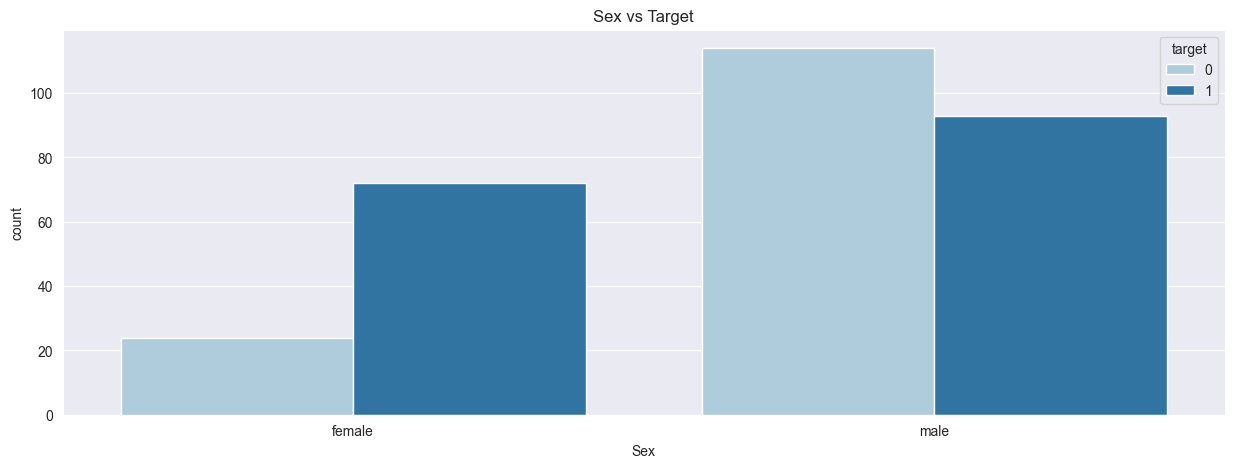

In [320]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, 
              x='sex',
              hue='target',
              palette=["#a6cee3", "#1f78b4"])
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.xticks(ticks=[0,1], 
           labels=['female', 'male'], rotation=0)
plt.show()

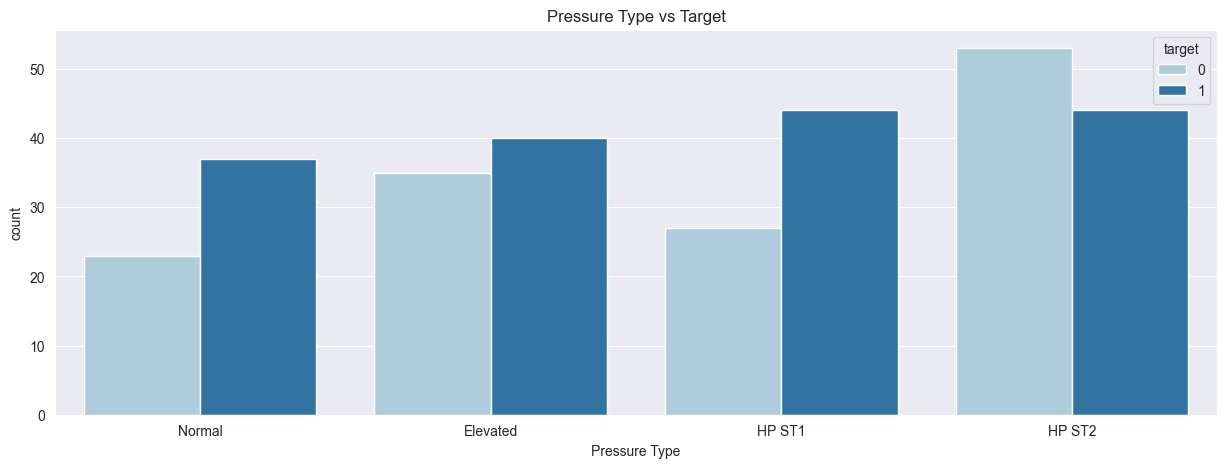

In [321]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, x='pres_type', 
              hue='target', 
              order=['0', '1', '2', '3'],
              palette=["#a6cee3", "#1f78b4"])
plt.title('Pressure Type vs Target');
plt.xlabel('Pressure Type')
plt.xticks(ticks=['0','1','2', '3'], 
           labels=['Normal', 'Elevated', 'HP ST1', 'HP ST2'], rotation=0);
plt.show()

### Observation

1. Chest Pain Type vs Target(1)
    * ~43% - `Atypical Angina` **New result**
    * ~24% - `Non-anginal Pain` **Not Confirmed**
    * ~24% - `Typical Angina`
    * ~9% - `Typical Angina`
2. Sex vs Target(1) 
   * ~45% - `female` **Not Confirmed**
   * ~55% - `male people` **New result**
3. Age vs Target(1) 173
   * ~10% - `Adults`
   * ~68% - `Middle age` **Confirmed**
   * ~22% - `Senior`
4. Pressure Type vs Target(1)
    * ~22% - `Normal` 
    * ~23% - `Elevated`
    * ~25% - `High Pressure Stage 1` **New Result**
    * ~25% - `High Pressure Stage 2` **Partially Confirmed**

# Conclusion  

There is the main common features of people who are at the heart attack risk group:
1. Sex: `Male` - 55%
2. Chest Pain Type: `Atypical Angina` - 43%
3. Age: `Middle Age` - 68%
4. Pressure Type: `HP ST1 / ST2` affect similarly - 25% and 25% respectively, but in general, approximately people's aptitude to struggling with heart attacks doesn't depend on type of `Blood Pressure`